In [1]:
import pandas as pd
import numpy as np
import io
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_params
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm 

# Задача 1

In [2]:
date_string = '''totwrk                       -0.169***         
                              (0.018)          
                                               
age                           2.689*           
                              (1.469)          
                                               
south                        101.568**         
                             (41.837)          
                                               
male                         87.669**          
                             (35.104)          
                                               
smsa                         -54.748*          
                             (33.123)          
                                               
yngkid                        -13.962          
                             (50.341)          
                                               
marr                          31.211           
                             (42.233)          
                                               
Constant                    3450.913***        
                             (80.726)'''

In [3]:
digital_date = re.findall(r'([-+]?\d+.\d+)',date_string)
digital_date

['-0.169',
 '0.018',
 '2.689',
 '1.469',
 '101.568',
 '41.837',
 '87.669',
 '35.104',
 '-54.748',
 '33.123',
 '-13.962',
 '50.341',
 '31.211',
 '42.233',
 '3450.913',
 '80.726']

In [4]:
beta = np.reshape(digital_date,(8,2))
beta

array([['-0.169', '0.018'],
       ['2.689', '1.469'],
       ['101.568', '41.837'],
       ['87.669', '35.104'],
       ['-54.748', '33.123'],
       ['-13.962', '50.341'],
       ['31.211', '42.233'],
       ['3450.913', '80.726']], dtype='<U8')

In [5]:
beta[:,0]

array(['-0.169', '2.689', '101.568', '87.669', '-54.748', '-13.962',
       '31.211', '3450.913'], dtype='<U8')

In [6]:
beta = beta[:,0].astype(float)
beta


array([-1.690000e-01,  2.689000e+00,  1.015680e+02,  8.766900e+01,
       -5.474800e+01, -1.396200e+01,  3.121100e+01,  3.450913e+03])

In [7]:
ppl_string = '''totwrk age south male smsa yngkid marr
----------------------------------------
1  2150  37    0    1    1     0     1  
2  1950  28    1    1    0     1     0  
3  2240  26    0    0    1     0     0 '''

In [9]:
ppl_lst = re.findall(r'([-+]?\d+)', ppl_string)
ppl_lst

['1',
 '2150',
 '37',
 '0',
 '1',
 '1',
 '0',
 '1',
 '2',
 '1950',
 '28',
 '1',
 '1',
 '0',
 '1',
 '0',
 '3',
 '2240',
 '26',
 '0',
 '0',
 '1',
 '0',
 '0']

In [10]:
X = np.reshape(ppl_lst,(3,8))
X

array([['1', '2150', '37', '0', '1', '1', '0', '1'],
       ['2', '1950', '28', '1', '1', '0', '1', '0'],
       ['3', '2240', '26', '0', '0', '1', '0', '0']], dtype='<U4')

In [11]:
X = np.delete(X,0,1)
X

array([['2150', '37', '0', '1', '1', '0', '1'],
       ['1950', '28', '1', '1', '0', '1', '0'],
       ['2240', '26', '0', '0', '1', '0', '0']], dtype='<U4')

In [12]:
X = np.c_[X,np.ones(3)]
X

array([['2150', '37', '0', '1', '1', '0', '1', '1.0'],
       ['1950', '28', '1', '1', '0', '1', '0', '1.0'],
       ['2240', '26', '0', '0', '1', '0', '0', '1.0']], dtype='<U32')

In [13]:
beta = beta.astype(float)
X = X.astype(float)

In [14]:
X@beta

array([3251.188, 3371.93 , 3087.519])

# Задача 2 

In [15]:
date_string = '''totwrk                       -0.167***         
                              (0.018)          
                                               
age                           -6.255           
                             (11.191)          
                                               
I(age*age)                        0.109           
                              (0.134)          
                                               
south                       114.547***         
                             (40.637)          
                                               
male                         90.457***         
                             (34.257)          
                                               
Constant                    3613.995***        
                             (218.433)'''

In [16]:
digital_date = re.findall(r'([-+]?\d+.\d+)',date_string)
digital_date

['-0.167',
 '0.018',
 '-6.255',
 '11.191',
 '0.109',
 '0.134',
 '114.547',
 '40.637',
 '90.457',
 '34.257',
 '3613.995',
 '218.433']

In [17]:
beta = np.reshape(digital_date,(6,2))
beta

array([['-0.167', '0.018'],
       ['-6.255', '11.191'],
       ['0.109', '0.134'],
       ['114.547', '40.637'],
       ['90.457', '34.257'],
       ['3613.995', '218.433']], dtype='<U8')

In [18]:
beta[:,0]

array(['-0.167', '-6.255', '0.109', '114.547', '90.457', '3613.995'],
      dtype='<U8')

In [19]:
beta = beta[:,0].astype(float)
beta

array([-1.670000e-01, -6.255000e+00,  1.090000e-01,  1.145470e+02,
        9.045700e+01,  3.613995e+03])

In [20]:
ppl_string = '''totwrk age age*age south male
1  2160  32   32*32   1    0  
2  1720  24   24*24   0    1  
3  2390  44   44*44   0    1'''

In [21]:
ppl_lst = re.findall(r'([-+]?\d+)', ppl_string)
ppl_lst

['1',
 '2160',
 '32',
 '32',
 '32',
 '1',
 '0',
 '2',
 '1720',
 '24',
 '24',
 '24',
 '0',
 '1',
 '3',
 '2390',
 '44',
 '44',
 '44',
 '0',
 '1']

In [22]:
X = np.reshape(ppl_lst,(3,7))
X

array([['1', '2160', '32', '32', '32', '1', '0'],
       ['2', '1720', '24', '24', '24', '0', '1'],
       ['3', '2390', '44', '44', '44', '0', '1']], dtype='<U4')

In [23]:
X = np.delete(X,0,1)
X

array([['2160', '32', '32', '32', '1', '0'],
       ['1720', '24', '24', '24', '0', '1'],
       ['2390', '44', '44', '44', '0', '1']], dtype='<U4')

In [24]:
beta = beta.astype(float)
X = X.astype(float)

In [25]:
X@beta

array([3198.569, 5928.379, 7984.509])

# Задача 3

In [26]:
date_string='''age                          0.021***          
                              (0.004)          
                                               
IQ                           0.008***          
                              (0.001)          
                                               
south                        -0.099***         
                              (0.027)          
                                               
married                      0.201***          
                              (0.040)          
                                               
urban                        0.175***          
                              (0.028)          
                                               
Constant                     4.974***          
                              (0.165)    '''

In [27]:
date_lst=re.findall(r'([-+]?\d+.\d+)', date_string)
date_lst

['0.021',
 '0.004',
 '0.008',
 '0.001',
 '-0.099',
 '0.027',
 '0.201',
 '0.040',
 '0.175',
 '0.028',
 '4.974',
 '0.165']

In [28]:
beta = np.reshape(date_lst, (6,2))
beta

array([['0.021', '0.004'],
       ['0.008', '0.001'],
       ['-0.099', '0.027'],
       ['0.201', '0.040'],
       ['0.175', '0.028'],
       ['4.974', '0.165']], dtype='<U6')

In [29]:
beta[:,0]

array(['0.021', '0.008', '-0.099', '0.201', '0.175', '4.974'], dtype='<U6')

In [30]:
beta = beta[:,0].astype(float)
beta

array([ 0.021,  0.008, -0.099,  0.201,  0.175,  4.974])

In [31]:
ppl_string = '''  age IQ  south married urban
-----------------------------
1 36  105   1      1      1  
2 29  123   0      1      0  
3 25  112   1      0      1'''

In [32]:
ppl_lst = re.findall(r'([-+]?\d+)', ppl_string)
ppl_lst

['1',
 '36',
 '105',
 '1',
 '1',
 '1',
 '2',
 '29',
 '123',
 '0',
 '1',
 '0',
 '3',
 '25',
 '112',
 '1',
 '0',
 '1']

In [33]:
X = np.reshape(ppl_lst,(3,6))
X

array([['1', '36', '105', '1', '1', '1'],
       ['2', '29', '123', '0', '1', '0'],
       ['3', '25', '112', '1', '0', '1']], dtype='<U3')

In [34]:
X = np.delete(X,0,1)
X

array([['36', '105', '1', '1', '1'],
       ['29', '123', '0', '1', '0'],
       ['25', '112', '1', '0', '1']], dtype='<U3')

In [35]:
X = np.c_[X,np.ones(3)]
X

array([['36', '105', '1', '1', '1', '1.0'],
       ['29', '123', '0', '1', '0', '1.0'],
       ['25', '112', '1', '0', '1', '1.0']], dtype='<U32')

In [36]:
beta = beta.astype(float)
X = X.astype(float)

In [37]:
X@beta

array([6.847, 6.768, 6.471])

# Задача 4

In [38]:
data_string = '''exper                        0.037***          
                              (0.006)          
                                               
I(exper2)                    -0.001***         
                             (0.0001)          
                                               
female                       -0.363***         
                              (0.040)          
                                               
married                      0.144***          
                              (0.045)          
                                               
smsa                         0.273***          
                              (0.044)          
                                               
Constant                     1.250***          
                              (0.061)'''

In [39]:
digital_date = re.findall(r'([-+]?\d+.\d+)',data_string)
digital_date

['0.037',
 '0.006',
 '-0.001',
 '0.0001',
 '-0.363',
 '0.040',
 '0.144',
 '0.045',
 '0.273',
 '0.044',
 '1.250',
 '0.061']

In [40]:
beta = np.reshape(digital_date,(6,2))
beta

array([['0.037', '0.006'],
       ['-0.001', '0.0001'],
       ['-0.363', '0.040'],
       ['0.144', '0.045'],
       ['0.273', '0.044'],
       ['1.250', '0.061']], dtype='<U6')

In [41]:
beta[:,0]

array(['0.037', '-0.001', '-0.363', '0.144', '0.273', '1.250'],
      dtype='<U6')

In [42]:
beta = beta[:,0].astype(float)
beta

array([ 3.70e-02, -1.00e-03, -3.63e-01,  1.44e-01,  2.73e-01,  1.25e+00])

In [43]:
ppl_string = '''exper female married smsa
---------------------------
1   5     1       1     1     1  
2  26     0       0     1     1  
3  38     1       1     0     1'''

In [44]:
ppl_lst = re.findall(r'([-+]?\d+)', ppl_string)
ppl_lst


['1',
 '5',
 '1',
 '1',
 '1',
 '1',
 '2',
 '26',
 '0',
 '0',
 '1',
 '1',
 '3',
 '38',
 '1',
 '1',
 '0',
 '1']

In [45]:
X = np.reshape(ppl_lst,(3,6))
X

array([['1', '5', '1', '1', '1', '1'],
       ['2', '26', '0', '0', '1', '1'],
       ['3', '38', '1', '1', '0', '1']], dtype='<U2')

In [46]:
X = np.delete(X,0,1)
X

array([['5', '1', '1', '1', '1'],
       ['26', '0', '0', '1', '1'],
       ['38', '1', '1', '0', '1']], dtype='<U2')

In [47]:
X = np.c_[X,np.ones(3)]
X

array([['5', '1', '1', '1', '1', '1.0'],
       ['26', '0', '0', '1', '1', '1.0'],
       ['38', '1', '1', '0', '1', '1.0']], dtype='<U32')

In [48]:
beta = beta.astype(float)
X = X.astype(float)


In [49]:
X@beta

array([1.488, 2.629, 2.565])

# Задача 5

In [50]:
data_string = '''log(capital)                 0.208***          
                              (0.017)          
                                               
log(labour)                  0.715***          
                              (0.023)          
                                               
Constant                     -1.711***         
                              (0.097)'''

In [51]:
digital_date = re.findall(r'([-+]?\d+.\d+)',data_string)
digital_date

['0.208', '0.017', '0.715', '0.023', '-1.711', '0.097']

In [52]:
beta = np.reshape(digital_date,(2,3))
beta

array([['0.208', '0.017', '0.715'],
       ['0.023', '-1.711', '0.097']], dtype='<U6')

In [53]:
beta = beta[:,0].astype(float)
beta

array([0.208, 0.023])

In [54]:
ppl_string ='''  capital labour
1  2.970 85  
2  10.450  60  
3  3.850  105  '''

In [55]:
X=re.findall(r'([-+]?\d+.\d+|[-+]?\d+)', ppl_string)
X

['1', '2.970', '85', '2', '10.450', '60', '3', '3.850', '105']

In [56]:
X = np.reshape(X, (3,3))
X

array([['1', '2.970', '85'],
       ['2', '10.450', '60'],
       ['3', '3.850', '105']], dtype='<U6')

In [57]:
X=np.delete(X, 0, 1)
X

array([['2.970', '85'],
       ['10.450', '60'],
       ['3.850', '105']], dtype='<U6')

In [59]:
beta=beta.astype(float)
X=X.astype(float)

In [60]:
X@beta

array([2.57276, 3.5536 , 3.2158 ])

# Задача 6

In [61]:
date_string='''log(capital)                 0.183***          
                              (0.017)          
                                               
log(labour)                  0.515***          
                              (0.083)          
                                               
I(log(capital)2)             0.023***          
                              (0.005)          
                                               
I(log(labour)2)               0.020**          
                              (0.010)          
                                               
Constant                     -1.304***         
                              (0.189) '''

In [62]:
date_lst=re.findall(r'([-+]?\d+.\d+)', date_string)
date_lst

['0.183',
 '0.017',
 '0.515',
 '0.083',
 '0.023',
 '0.005',
 '0.020',
 '0.010',
 '-1.304',
 '0.189']

In [63]:
beta = np.reshape(date_lst, (5,2))
beta

array([['0.183', '0.017'],
       ['0.515', '0.083'],
       ['0.023', '0.005'],
       ['0.020', '0.010'],
       ['-1.304', '0.189']], dtype='<U6')

In [64]:
beta = beta[:,0].astype(float)
beta

array([ 0.183,  0.515,  0.023,  0.02 , -1.304])

In [65]:
ppl_string ='''  capital labour
1  22.140   407  
2  7.320   197  
3  0.670    31  '''

In [66]:
X=re.findall(r'([-+]?\d+.\d+|[-+]?\d+)', ppl_string)
X

['1', '22.140', '407', '2', '7.320', '197', '3', '0.670', '31']

In [67]:
X = np.reshape(X, (3,3))
X

array([['1', '22.140', '407'],
       ['2', '7.320', '197'],
       ['3', '0.670', '31']], dtype='<U6')

In [68]:
X=np.delete(X, 0, 1)
X

array([['22.140', '407'],
       ['7.320', '197'],
       ['0.670', '31']], dtype='<U6')

In [78]:
X = np.c_[X, np.ones(3)]
X

array([[ 22.14, 407.  ,   1.  ,   1.  ,   1.  ],
       [  7.32, 197.  ,   1.  ,   1.  ,   1.  ],
       [  0.67,  31.  ,   1.  ,   1.  ,   1.  ]])

In [75]:
beta=beta.astype(float)
X=X.astype(float)

In [76]:
X@beta

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 4)

# 1.1

In [79]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df['totwrk2_10000'] = df['totwrk']**2/10000

In [80]:
model = smf.ols(data = df , formula = 'sleep~I(totwrk/100)+totwrk2_10000 +  age + smsa + male + south').fit()
model_1 = smf.ols(data = df , formula = 'I(totwrk/100)~totwrk2_10000 +  age + smsa + male + south').fit()
model_2 = smf.ols(data = df , formula = 'totwrk2_10000~ I(totwrk/100)+  age + smsa + male + south').fit()
model_3 = smf.ols(data = df , formula = 'male~I(totwrk/100)+ I(totwrk/100)+  age + smsa  + south').fit()
model_1.params.round(3)

Intercept        9.003
totwrk2_10000    0.021
age             -0.008
smsa             0.357
male             1.071
south            0.989
dtype: float64

In [81]:
VIF_totwrk100 = 1/(1 - model_1.rsquared)
VIF_totwrk100.round(3)

8.48

In [82]:
VIF_totwrk2_10000 = 1/(1 - model_2.rsquared)
VIF_totwrk2_10000.round(3)

8.28

In [83]:
VIF_male = 1/(1 - model_3.rsquared)
VIF_male.round(2)

1.17

In [84]:
variance_inflation_factor(model.model.exog, 5).round(3)

1.173

In [85]:
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,totwrk2_10000
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,1181.9844
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,2520.0400
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,792.4225
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,1433.3796
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,665.6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,410.4676
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,45.5625
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,342.6201
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,384.5521


In [86]:
df = df[['male', 'age', 'smsa']].copy()
corr_matrix = df.corr().round(3)
corr_matrix

,male,age,smsa
male,1.000,0.032,0.007
age,0.032,1.000,0.025
smsa,0.007,0.025,1.000


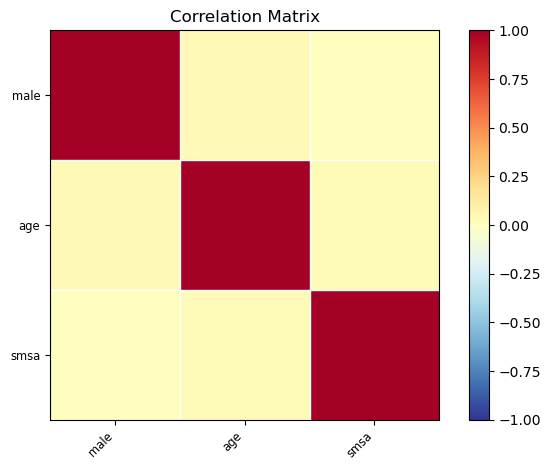

In [89]:
sm.graphics.plot_corr(corr_matrix, xnames=df.columns, normcolor=True, )
plt.show()

# Задача 2

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df['age_2']=df['age']*df['age']
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,age_2
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,2916


In [91]:
model = smf.ols(data = df , formula = 'sleep~totwrk +  age + +age_2+ smsa + male + south').fit()
model_1 = smf.ols(data = df , formula = 'age_2~totwrk +  age + smsa + male + south').fit()
model_2 = smf.ols(data = df , formula = 'male~totwrk+  age+age_2 + smsa  + south').fit()
model_3 = smf.ols(data = df , formula = 'age~totwrk+  age + smsa +male + south').fit()
model_1.params.round(3)

Intercept   -1552.146
totwrk         -0.019
age            83.036
smsa           -0.555
male            2.636
south          17.250
dtype: float64

In [92]:
model_1.rsquared

0.9847552819309748

In [93]:
VIF_1 = 1/(1 - round(model_1.rsquared,3))
VIF_1.round(2)

66.67

In [94]:
VIF_2 = 1/(1 - round(model_2.rsquared,3))
VIF_2.round(2)

1.17

In [95]:
model_3.rsquared

1.0

In [96]:
VIF_3 = 1/(1 - model_3.rsquared)
VIF_3.round(2)

/var/folders/q2/4gx_66_126jg4z_sl6ggn19m0000gn/T/ipykernel_12405/2082198633.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  VIF_3 = 1/(1 - model_3.rsquared)


inf

# Задача 3

In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


In [98]:
df['totwrk_south'] = df['totwrk'] * df['south']
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq,totwrk_south
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,3438,0,3438,0,14,0,13,7.070004,1024,0
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,5020,0,5020,0,11,0,0,1.429999,961,5020
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,2815,0,2815,0,21,0,0,20.529997,1936,0
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,3786,0,3786,0,12,0,12,9.619998,900,0
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,2580,0,2580,0,44,0,33,2.750000,4096,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,2026,0,2026,0,27,0,18,NaN,2025,0
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,675,1,465,210,18,0,4,NaN,1156,0
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1851,0,1851,0,19,0,17,NaN,1369,0
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1961,1,1481,480,31,0,22,NaN,2916,1961


In [99]:
model = smf.ols(data = df , formula = 'sleep ~ totwrk+south+totwrk_south+age+male+smsa').fit()
model_1 = smf.ols(data = df , formula = 'totwrk ~ south+totwrk_south+age+male+smsa').fit()
model_2 = smf.ols(data = df , formula = 'south ~ totwrk+totwrk_south+age+male+smsa').fit()
model_3 = smf.ols(data = df , formula = 'totwrk_south ~ totwrk+south+age+male+smsa').fit()
model_1.params.round(3)

Intercept       1883.936
south          -1780.732
totwrk_south       0.862
age               -3.438
male             645.996
smsa             -46.641
dtype: float64

In [100]:
VIF_1 = 1/(1 - round(model_1.rsquared,3))
VIF_1.round(2)

1.32

In [101]:
VIF_2 = 1/(1 - round(model_2.rsquared,3))
VIF_2.round(2)

8.55

In [102]:
VIF_3 = 1/(1 - round(model_3.rsquared,3))
VIF_3.round(2)

8.77

# Задача 4

In [103]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage2.csv')
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [104]:
model = smf.ols(data = df , formula = 'np.log(wage) ~ age+ I(age**2)+ IQ+ married+ south+ urban').fit()
model_1 = smf.ols(data = df , formula = 'age ~ I(age**2)+ IQ+married+south+urban').fit()
model_2 = smf.ols(data = df , formula = 'I(age**2) ~ age+ IQ+married+south+urban').fit()
model_3 = smf.ols(data = df , formula = 'urban ~age+I(age**2)+IQ+married+south').fit()
model_1.params.round(3)

Intercept      16.514
I(age ** 2)     0.015
IQ             -0.000
married        -0.003
south           0.010
urban           0.014
dtype: float64

In [105]:
VIF_1 = 1/(1 - round(model_1.rsquared,3))
VIF_1.round(2)

500.0

In [106]:
VIF_2 = 1/(1 - round(model_2.rsquared,3))
VIF_2.round(2)

500.0

In [107]:
VIF_3 = 1/(1 - round(model_3.rsquared,3))
VIF_3.round(2)

1.02

# Задача 5

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/wage2.csv')
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935


In [109]:
df['age_urban']=df['age']*df['urban']
df['IQ_urban']=df['IQ']*df['urban']
df

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage,age_urban,IQ_urban
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091,31,93
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562,37,119
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384,33,108
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973,32,96
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502,34,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,520,40,79,28,16,6,1,30,1,1,1,0,0,1.0,11.0,NaN,6.253829,0,0
931,1202,40,102,32,13,10,3,31,1,0,1,1,7,7.0,8.0,6.0,7.091742,31,102
932,538,45,77,22,12,12,10,28,1,1,1,0,9,NaN,7.0,NaN,6.287858,0,0
933,873,44,109,25,12,12,12,28,1,0,1,0,1,1.0,NaN,11.0,6.771935,0,0


In [110]:
model_1 = smf.ols(data = df , formula = 'age ~ urban+age_urban+ IQ+IQ_urban').fit()
model_2 = smf.ols(data = df , formula = 'urban ~ age+age_urban+IQ+IQ_urban').fit()
model_3 = smf.ols(data = df , formula = 'age_urban ~ age+urban+IQ+IQ_urban').fit()
model_1.params.round(3)

Intercept    33.242
urban       -33.242
age_urban     1.000
IQ           -0.001
IQ_urban      0.001
dtype: float64

In [111]:
VIF_1 = 1/(1 - round(model_1.rsquared,3))
VIF_1.round(2)

3.32

In [112]:
VIF_2 = 1/(1 - round(model_2.rsquared,3))
VIF_2.round(2)

166.67

In [113]:
VIF_3 = 1/(1 - round(model_3.rsquared,3))
VIF_3.round(2)

111.11